#### STATS 102 Introduction to Data Science Session 2, 2019 Fall

---

# Heart attack prediction

- Zexin Lin (zexin.lin@dukekunshan.edu.cn) 
- Zesen Zhuang (zesen.zhuang@dukekunshan.edu.cn)
- Jinxuan Zhang (jinxuan.zhang@dukekunshan.edu.cn)

## **Warning**

**Warning**: In case that our code cannot run sucesfully, we provide an identical verson held by google colab, you can run my code there. Here is the link:

https://colab.research.google.com/drive/148gdPtjoBAyLSc88bMFcSefTmuq0sK4n?usp=sharing

## 1 Introduction

Nowadays, heart disease has become a global health problem. Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Our group members are curious about what attributes have a direct relationship with the heart attack, we hope we could construct a predictive model to estimate the probability of the heart attack according to personal information such as age, sex, and so on. To choose the proper attributes to sever with the intellectual model. After checking some related literature, we have chosen fourteen attributes as the predicted indexes to construct the model.

    1) age
    2) sex 0 = female, 1 = male
    3) chest pain type (4 values)
    4) resting blood pressure
    5) serum cholesterol in mg/dl
    6) fasting blood sugar > 120 mg/dl
    7) resting electrocardiographic results (values 0,1,2)
    8) maximum heart rate achieved
    9) exercise-induced angina
    10) old peak = ST depression induced by exercise relative to rest
    11) the slope of the peak exercise ST segment
    12) number of major vessels (0-3) colored by fluoroscopy
    13) THAL: 0 = normal; 1 = fixed defect; 2 = reversable defect
    14) target: 0 = less chance of heart attack 1 = more chance of heart attack

After the pre-processing and vasodilation, we choose the Deep Neural Network (DNN) model which has higher accuracy and lower variance. Finally, we find that the attributes of resting electrocardiographic results and maximum heart rate and age will impact the probability of heart disease. Among these factors, we find that the maximum heart rate achieved has the closest relationship with a heart attack. Through this project, our suggestion to prevent heart disease is that people are supposed to take more exercise to promise the heart normal work.  

## 2 Background 

Artificial intelligence has been widely used in the medical field. In recent years, in the field of artificial intelligence technology and health care integration deepening, as the field of artificial intelligence, voice interaction, computer vision, and cognitive computing technology of mature gradually, application scenario for the more abundant with artificial intelligence, artificial intelligence technology become influence the health care industry development, also an important factor to Dentry records, medical imaging diagnosis, drug research and development, the medical robots, the personal health of big data intelligent analysis and so on.

When talking about the heart disease probability prediction, there was much previous work has predicted the heart disease probability by using various model, it is about 15 works between 1970 to 2009. However, the attributes they have chosen are different and most works only focus on one aspect attributes such as environmental effects or living habit effects. We think that we could construct a comprehensive model that picks the most important attributes. As there are so many attributes relate to heart disease, we picked 14 attributes that have a close relationship with heart disease according to the referred literature. Except for these attributes, we also choose some basic personal information such as sex, the age which could help us to construct a holistic model.

## 3 Design and Implementation

### 3.1 Data Source

The dataset for this project was sourced from kaggle. In order to expand the data capacity, this dataset was created by merging clinical data from three different research projects. The data was collected from various region inlude Cleveland, Hungarian, Switzerland, Long Beach VA, and Stalog, which reduce the bias of the data due to geographical factors to a resonable extent. The dataset contains eleven predictive features and one predictive target. Continuous features include age, resting blood pressure, cholesterol level, maximum heart rate, and ST-depression peak; Categorical featuers include gender, type of chest pain, fasting glucose level, type of ECG, presence of angina, and ST slope; and the predictive target is the presence of heart desease. 

### 3.2 Data Exploration

In this subsection we explore the basic overview of the dataset, including the distribution of the indicators, the correlation between the features and the correlation between the featrues and the target. We visualize and then analyze the data by using python packages `seaborn`,  `matplotlib` and `pandas`.

#### 3.2.1 Overview of Feature Distribution

Table I

|      |  age |  sex | chest pain type | resting bp s | cholesterol | fasting blood sugar | resting ecg | max heart rate | exercise angina | oldpeak | ST slope | target |
| ---: | ---: | ---: | --------------: | -----------: | ----------: | ------------------: | ----------: | -------------: | --------------: | ------: | -------: | -----: |
|    0 |   40 |    1 |               2 |          140 |         289 |                   0 |           0 |            172 |               0 |       0 |        1 |      0 |
|    1 |   49 |    0 |               3 |          160 |         180 |                   0 |           0 |            156 |               0 |       1 |        2 |      1 |
|    2 |   37 |    1 |               2 |          130 |         283 |                   0 |           1 |             98 |               0 |       0 |        1 |      0 |
|    3 |   48 |    0 |               4 |          138 |         214 |                   0 |           0 |            108 |               1 |     1.5 |        2 |      1 |
|    4 |   54 |    1 |               3 |          150 |         195 |                   0 |           0 |            122 |               0 |       0 |        1 |      0 |

Talbe #1 illustrate the basic look of dataset, which contains 1,190 entries, each entry represents the clinical record of an individual patient. 

![plot_1](./figures/plot_1.png)

Plot #1 illustrates the original distribution of the continuous features in the dataset. Overall, the age, resting blood pressure, maximum heart rate, and the seond half of the cholesterol level fit the caracteristics of the Gaussian distribution, which is one of the reasons why we choose the Gaussian Naive Bayes classifier model as on of the candidates. The distribution of cholesterol levels shows that there are about 170 samples with a value of 0. By intuition of medical commom sense, we identified these as abnormal data and drop them. 

![plot_2](./figures/plot_2.png)

Plot #2 shows the basic distribution of categorical features. In general, the distribution of discontinuous features is not particularly uniform, but, except for the ST-slope, there does not exist extreme distribution, i.e., the proportion of one indicator occupy most proportions and vice versa. Since this study mainly focuses on analyzing continuous features, we assign less importance to the distribution of categorical features. Since most of the fetures do not show extreme cases, we consider that their influeence on the model training result can be ignored in this case.

#### 3.2.2 Eliminate Invalid Data

![plot_3](./figures/plot_3.png)

Based on the precceding overview of data, we decided to remove the entries with a cholesterol level of 0. Plot #3 illustrates the distribution of continuous features in the dataset after removing the invalid entries. As shown in the plot, all features except oldpeak are close to normal distribution. We spectulate that the processed data can effectively reduce the bias of model training.

#### 3.2.3 Correlation Map for Continuous Features

![plot_4](./figures/plot_4.png)

Plot #4 illustrates the correlation matrix for continuous features and target. Each entry of the correlation map correspoding to the sample Pearson correlation coefficient of the coresponding features; The closer the absolute value of the correlation coefficient is to 1, the stronger the linear correlation between the two variables, and vice versa. The correlation coefficients are calculated by the formula below.
$$
r_{xy} = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^n(y_i - \bar{y})^2}}
$$
Where:

- $n$ Is sample size
- $x_i, y_i$ are the individual sample points indexed with $i$
- $\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$ (the sample mean); and analogously for $\bar{y}$

According to the figure, relatively, oldpeak and age have a strong positive linear correlation with the occurrence of heart disease; while maximum heart rate has a strong negative linear correlation with the occurrence of heart disease. Accordingly, we can make simple conjectures about the result.

- Conjecture 1: Cases with higher oldpeak values are more likely to develop heart disease, and vice versa.
- Conjecture 2: The lower the maximum heart rate and resting blood pressure, the less likely this person is to develop heart disease, and vice versa.

These conjectures will be verified or rejected in the model analysis that follows.

### 3.3 Data Pre-processing

After obtaining the general condition of the data and removing invalid entries, we pre-process the data to make it more suitable for machine learning model training.  Data preprocessing consists of four main components: processing categorical features, zero-centering,  standardization and train-test data splitting.

In the first step, we convert categorical features into one-hot code. A one-hot is a group of bits among which the legal combinations of values are only those with a single high bit and all the others low (Harris, 2019). For example, a categorical feature "Color" consists of three possible values, "red" represented by digit 1, "green" represented by digi 2, and "blue" represented by digit 3. After being converted to one-hot, the feature "color = 2" will be split into three dummy features, as shown below.

| Color_red | Color_green | Color_blue |
| :-------: | :---------: | :--------: |
|     0     |      1      |     0      |

One-hot encoding ensures that machine learning does not assume that higher numbers are more important.

In the second step we zero-center the data using the follwing formula:
$$
\hat{x}_i = \bar{x}_i - E_x[X]
$$
In deep-learning scenarios, a zero-centered dataset allows exploiting the symmetry of some activation function, driving to a faster convergence.

Then we standardize all features. By doing so we're able to convert the structure of disparate dataset into a common data format, which ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features. The data standardization  is based on following formula:
$$
X' = \frac{X - \mu}{\sigma}
$$
Where $\mu$ is the mean of the feature values and $\sigma$ is the standard deviation of the feature values.

Finally, we randomly split train and test data into two parts in a ratio of $4 : 1$.

### 3.4 Model Training

In this project, deep neural networks (multilayer perception classifier) as well as Gaussian Naive Bayes classifier were chosen as two candidate models. Due to the increase of computing power, the application share of DNN in medical field is now rapidly increasing in recent years, while the Naive Bayes Classifier is currently a more mature machine learning model. In this section, we will train and validate these models respectively thereby select the better one.

#### 3.4.1 MLPC Model Training

A Deep Neural Network is a kind of Artificial Neural Network. The first problem is what is the Artificial Neural Network? Artificial neural networks (ANNs) or connectionist systems are computing systems inspired by the biological neural networks that constitute animal brains. Such systems learn (progressively improve their ability) to do tasks by considering examples, generally without task-specific programming. An ANN is based on a collection of connected units called artificial neurons, (analogous to biological neurons in a biological brain). Each connection (synapse) between neurons can transmit a signal to another neuron. The receiving (postsynaptic) neuron can process the signal and then signal downstream neurons connected to it. The picture below shows how the neural network model could work. 

![plot_4](./figures/lzx_1.png)

Deep Neural Network (DNN) is a kind of Artificial Neural Network (ANN) with multiple layers between the input and output layers. There are different types of neural networks but they always consist of the same components: neurons, synapses, weights, biases, and functions. These components functioning similarly to the human brain and can be trained like any other ML algorithm. 

DNNs can model complex non-linear relationships. DNN architectures generate compositional models where the object is expressed as a layered composition of primitives. The extra layers enable the composition of features from lower layers, potentially modeling complex data with fewer units than a similarly performing shallow network. 

The MLPC model of this project is a sequential model, consisting of four layers of neurons. The first layer is an input layer containing 22 neurons without activation function; the second and third layers are fully connected layers containing 64 neurons with rectified linear activation function; the last layer is an output layer containing two neurons without activation funciton. Due to the limitation of training data size, this model does not use methods such as Dropout that prevents overfitting in order to reduce the effect of randomness on the model to some extent.

This model uses the Stochastic gradient descent algorithm as the optimizer and the mean squared error as the loss funciton. 

Stochastic gradient descent is an iterative method for optimizing an objective function, the mean squared error in this case, with suitable smoothness properties. A simple example is to fit a straight line $\hat{y}=w_1 + w_2 x$ to a training set with observations $(x_1, x_2,\cdots,x_n)$ and corresponding estimated responses $(\hat{y}_1, \hat{y}_2,\cdots,\hat{y}_n)$ using least squares. The loss function to be minimized is illustrated below:
$$
Q(w) = \sum_{i=1}^nQ_i(w)
=\sum_{i=1}^n(w_1 + w_2x_i - y_i)^2
$$
Then the algorithm will repeatly doing the follow step:
$$
{\displaystyle {\begin{bmatrix}w_{1}\\w_{2}\end{bmatrix}}:={\begin{bmatrix}w_{1}\\w_{2}\end{bmatrix}}-\eta {\begin{bmatrix}{\frac {\partial }{\partial w_{1}}}(w_{1}+w_{2}x_{i}-y_{i})^{2}\\{\frac {\partial }{\partial w_{2}}}(w_{1}+w_{2}x_{i}-y_{i})^{2}\end{bmatrix}}}
$$
Where $\eta$ represents the learning rate.

And the mean squared error, the loss funciton in our model, can be calculated by following function:
$$
{\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.}
$$
And for our project, we iterate the Stochastic gradient decent process for 50 times.

![plot_5](./figures/plot_5.png)

Plot 5 shows the training curve for the MLPC model. It can be seen that the accuracy improvement of the model is relatively smooth and reaches about 85 percent in the end.

![plot_6](./figures/plot_6.png)

Plot 6 shows the confusion matrix of the MLPC model. It can be seen that the false positive and false negative of this model are kept at an acceptable level (<.2), which indicates that the model has a relatively low bias and has acceptable reliability.

Then, we cross-validated the model. In this part, we randomly divided the same dataset into training as well as test data several times and used them to train and test the model to derive its accuracy. We repeated this process 50 times.

![plot_7](./figures/plot_7.png)

Plot 7 illustrates the accuracy distribution curve of the MLPC model. Over fifty training sessions, the average accuracy is about .85 with a standard deviation of .026, and is generally close to a normal distribution. This indicates that the model is stable and has a good average precision. We consider this result to be acceptable.

#### 3.4.2 Gaussian Naive Bayes Model Training

The second model we choose is the naïve Bayes model. Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. 

Abstractly, naïve Bayes is a conditional probability model: given a problem instance to be classified, represented by a vector  $\vec{x}=(X1, X2……, Xn){\displaystyle \mathbf {x} =(x_{1},\ldots ,x_{n})}$ representing some *n* features (independent variables), it assigns to this instance probabilities 
$$
p(C_k|x_1,\cdots,x_n)
$$
The problem with the above formulation is that if the number of features *n* is large or if a feature can take on a large number of values, then basing such a model on a probability table is infeasible. We, therefore, reformulate the model to make it more tractable. Using Bayes theorem, the conditional probability can be decomposed as 
$$
p(C_k|x)=\frac{p(C_k)p(x|C_k)}{p(x)}
$$
Below we simply introduce one typical model in the naïve Bayes, the Gaussian naïve Bayes. 

When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution. For example, suppose the training data contains a continuous attribute, x. We first segment the data by the class and then compute the mean and variance of x in each class. Let $\mu_k$ be the mean of the values in x associated with class $C_k$, and let $\sigma^2k$ be the Bessel corrected variance of the values in x associated with class $C_k$. Suppose we have collected some observation value v. Then, the probability distribution of v given a class Ck can be computed by plugging v into the equation for a normal distribution parameterized by $\mu k$ and $\sigma^2k$. That is, 
$$
p(x=v|C_k)=\frac{1}{\sqrt{2\pi\sigma^2_k}e^{-\frac{(v-\mu_k)^2}{2\sigma_k^2}}}
$$
![plot_8](./figures/plot_8.png)

Plot 8 illustrates the confusion matrix for naive bayes model. As the figure shows, this model has a very high true nagative ratio, but the true positive and fals positive ratios are very poor, which indicates that the model is able to accurately judge the sample as not having heart disease when it does not have, but cannot make accurate judgements when the sample does have heart disease.

![plot_9](./figures/plot_9.png)

Then we carried out the cross-validation for the naive bayes model. Plot 9 illustrates the accuracy distribution of the model. Given that this model does not require intensive computation, we trained the model for 1,000 times to obtain more acurate result. According to the plot, the accuracy clustered in two peaks, namely around .7 and .84, with standard deviation of .05 and mean of .74. Which means both the accuracy and stability of this model would be inferior toward the MLPC model.

Taking these considerations into account, we decided to choose the MLPC model for the subsequent analysis.

### 3.5 Regression Analysis

Next we carry out partial regression analysis for each individual features (focusing on the continuous features). We will analyse the impact of changes in individual features on the final predictions of the model. In detail, we plot a scatter plot with that features as the independent variable and the model prediction outcome as the dependent variable, and do a linear regression analysis on these data points. The model predictions will be presented in "score", which calculated by the following formula:
$$
\text{Score}=\frac{x_2 - x_1}{|x_1| + |x_2|}
$$
Where $x_1$ and $x_2$ represent the activation values of the two output neurons respectively. The higher the score, the more likely the sample is to experience heart disease. However, it is worth noting that due to the crude calculation of the scores, we do not use the magnitude of the change in predicted outcomes as an significant observation point; we simply focus on the trend of the change in scores and use this as a reference for drawing conclusions.

For the categorical features, we adopt a slightly different strategy. Similarly, we use age as the independent variable and the predicted outcome as the dependent variable, and plot the regression curves on the same graph with different values of the categorical feature respectively, and we can do analysis akin to continuous variable after then.

#### 3.5.1 Seperate Analysis on Cholesterol

Since we found  the effect of cholesterol changes on the results predicted by this model to be very unstable, we decided to analyze this feature separately. We trained the model ten times and used them separately for prediction. We plotted the regression curves of the cholesterol-score from the ten training sessions on the same graph for subsequent comparative analysis.

## 4 Results

For the Regression Analysis part, we focused on the relationship between the target feature and the possibility of having a heart attack. For the variables in the pictures, the relation between the value of the feature and the score will describe the changing trend of the possibility of having a heart attack as the change of feature variables. In the picture ‘regression analysis1’, we plot some graphs with continuous features, and they can be separated into three categories. The first category is that the possibility would increase if the continuous feature change from 0 to 1 which includes age, resting bp, and old peak. The second one is the opposite including max heart rate. And the most important one is the feature – Cholesterol. Though the graph we draw shows that the possibility decreases, the trend changes between positive and negative as we analyze it many times. 

![zjx_2](figures/zjx_2.png)

In the picture ‘regression analysis2’, we plot the relations between different categorical features and age. In the graphs, if one regression line was always above another one, it means that people in this feature have higher possibility of suffering from the heart attack and the trend would change with age.

![zjx_2](figures/zjx_3.png)

In the picture ‘Regression Analysis - Cholesterol’, we try ten times on the analysis on the feature Cholesterol and plot all the regression trend and find out that the trend varies in the very large scale, which shows great instability. 

![zjx_2](figures/zjx_1.png)

## 5 Conclusions 

### 5.1 Analysis Conclusions:

After doing plenty of regression analysis of each feature of the heart attack including continuous and discontinuous ones, we find out several results related to the possibility of suffering from the heart attack. The first result is that the max heart rate plays the most important role in deciding whether one would suffer from a heart attack. We simulate the situation of changing the data of each feature continuously from lowest to highest and find out that the influence of max heart rate works as the highest one. In fact, during the research and simulation process, we notice that the feature Cholesterol has a special influence rate differing from the other ones. Most of the related feature has the consist changing curve, which means they are always increasing or decreasing as their values changing themselves. However, when it comes to the situation of Cholesterol, things seem to be different. According to our ten times simulations of feature Cholesterol, this feature has shown a completely different changing trend in each test. As the test results are shown on the screen, we can see that among the ten times of simulations, some of them are decreasing and some others are increasing.

![zjx_1](./figures/zjx_1.png)

### 5.2 Drawbacks of the Research:


There exist many limitations in our analysis process. For example, features of the samples not only have an impact on the possibility of suffering from a heart attack but also influence each other. While due to the time limit, we fail to combine different features to figure out the correlations between multivariable features and the possibility of suffering from a heart attack. The analysis of regression focuses on the impact each feature has on the possibility of suffering from a heart attack individually. However, there also exist more connections and relations between the features we estimate separately. More research about the features affecting the possibility of suffering from a heart attack can be done to collect more data on the connections between the features we estimate. It would potentially give us a better model which can lead to much more precise data and results. In the future study, we can dig more into this aspect and figure out the connections between multivariable features and the possibility of having a heart attack. 

Besides the limitations on processing the data we collect, there also exist many to be improved in terms of the sample choosing and collecting. First is limitations on sample choosing, the distribution of the samples is not average. Male data has three times as much as female data which makes it not so precise to figure the connections between sex and the possibility. Besides the sex issue, the data of people who are above 70 and below 30 are inadequate. We have most of the data from people between 40 to 70, people in this age group can all be described as middle-aged people. The incomprehensive age data would lead to improper process results. Many people deteriorate rapidly only when they reach a certain age, and most people are very healthy when they are very young. This would have a great impact on the results of connections between age and the possibility of suffering from a heart attack.   

<img src="figures/sex.png" alt="sex" style="zoom:60%;" />

<img src="figures/Age Influence.jpg" alt="sex" style="zoom:60%;" />

Besides the drawbacks in collecting, choosing, and processing the samples, the insufficiency of the data also results in the lack of precision of data analysis. In “How Training Data Affect the Accuracy and Robustness of Neural Networks for Image Classification”, Lei’s results of the experiment showed that with more training data, accuracy and robustness would improve initially, however, there exists a turning point after which accuracy keeps increasing while robustness starts to decrease (2019). We also did some corresponding experiments to support the idea that we use 100, 500, and 1000 different sample data to analyze them on the accuracy of the model we built. We didn’t look into the robustness of these different data volumes, since we have done the pre-processing of the data set and drop all the dirty data to keep the data set clean and valid. After the experiment, we have adequate evidence to support what Lei argued in their research. In which case, we believe that more data will help get more precise data while this process has a turning point since more data also makes it harder to do the pre-processing and drop the dirty data, it would also be hard for computers to cope with errors during execution.

## 6 Individual Contribution

In the data collecting and preparatory work part, all of us were working on it. We have three ideas initially for the final project topic.

In the building up part of the two models we use, Zesen Zhuang and Jinxuan Zhang worked on it. Zesen Zhuang was in charge of DNN model and Jinxuan Zhang was in charge of the Naïve Bayes. Zesen Zhuang was especially in charge of the cross validation and recursion analysis part.

And in terms of final report writing, all of us were working on the draft writing. Zesen Zhuang worked on the design and implementation, Zexin Lin worked on the Introduction and Background part, and Jinxuan Zhang worked on the Conclusion part. Besides, Zesen Zhuang and Jinxuan Zhang collaborate on the results part.

## Reference

Harris, D. M., Harris, S. L., Prinz, P., & Crawford, T. (2019). Digital design and computer architecture.

Lei, S., & Zhang, H. (2019). HOW TRAINING DATA AFFECT THE ACCURACY AND ROBUSTNESS OF NEURAL NETWORKS FOR IMAGE CLASSIFICATION. Retrieved December 15, 2020, from https://openreview.net/pdf?id=HklKWhC5F7

Siddhartha, M. (2019). [Heart Disease Dataset (Comprehensive)]. Unpublished raw data.

## Appendix

Here are our code

Data Source: https://www.kaggle.com/sid321axn/heart-statlog-cleveland-hungary-final

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

from sklearn.naive_bayes import *
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tqdm import tqdm

## Data Exploration

In [2]:
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
categorical = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']
continuous = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

display(data)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
data_continuous = data[continuous]
data_categorical = data[categorical]

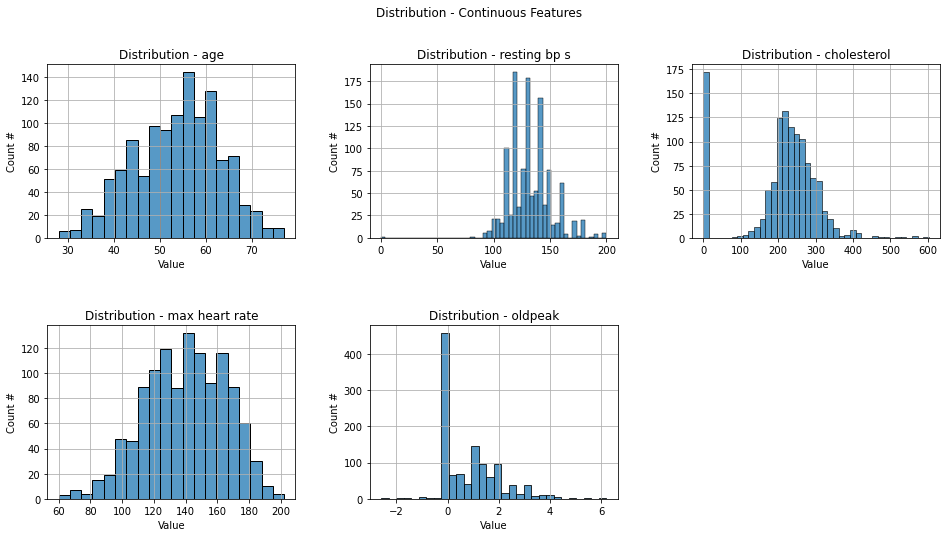

In [4]:
plt.figure(figsize=(16, 8))

cont_cnt = 0
for feature in continuous:
    cont_cnt += 1
    plt.subplot(2, 3, cont_cnt)
    plt.grid()
    sns.histplot(data[feature])
    plt.title('Distribution - ' + feature)
    plt.xlabel('Value')
    plt.ylabel('Count #')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle('Distribution - Continuous Features')
plt.show()

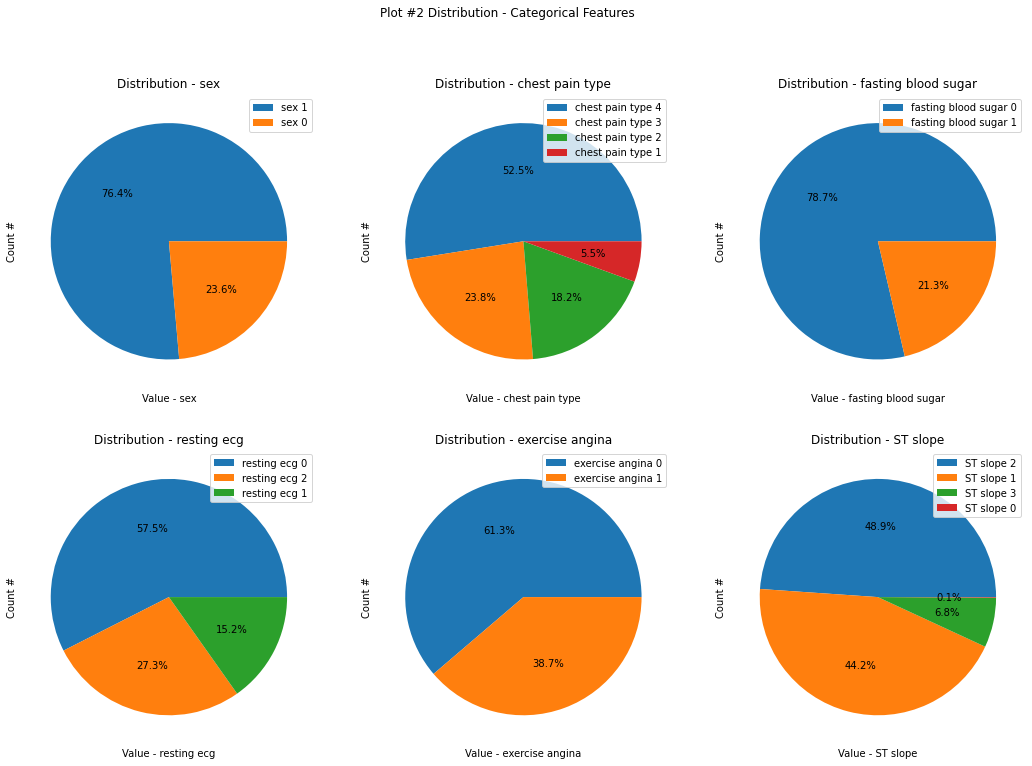

In [5]:
plt.figure(figsize=(18, 12))

cont_cnt = 0
for feature in categorical:
    cont_cnt += 1
    plt.subplot(2, 3, cont_cnt)
    plt.grid()
    counts = data[feature].value_counts()
    labels = []
    for index in counts.index:
        labels.append(f'{feature} {index}')
    plt.pie(counts, autopct='%1.1f%%')
    plt.legend(labels=labels)
    plt.title('Distribution - ' + feature)
    plt.xlabel(f'Value - {feature}')
    plt.ylabel('Count #')

plt.suptitle('Plot #2 Distribution - Categorical Features')
plt.show()

### Drop Invalid Rows (cholesterol equals to zero)

In [6]:
data = data.drop(index=data[data['cholesterol'] == 0].index)

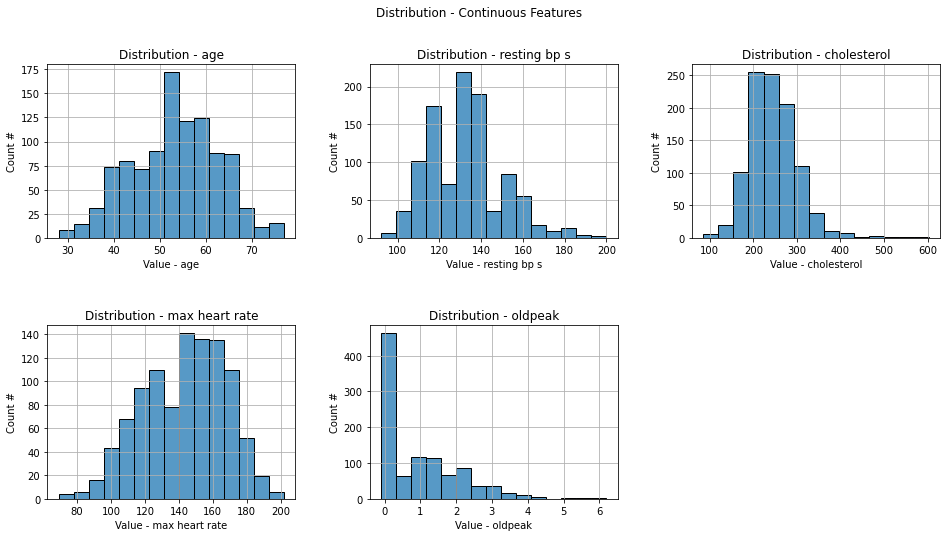

In [7]:
plt.figure(figsize=(16, 8))

cont_cnt = 0
for feature in continuous:
    cont_cnt += 1
    plt.subplot(2, 3, cont_cnt)
    plt.grid()
    sns.histplot(data[feature], bins=15)
    plt.title('Distribution - ' + feature)
    plt.xlabel(f'Value - {feature}')
    plt.ylabel('Count #')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle('Distribution - Continuous Features')
plt.show()

### Correlation Map - Continuous Features

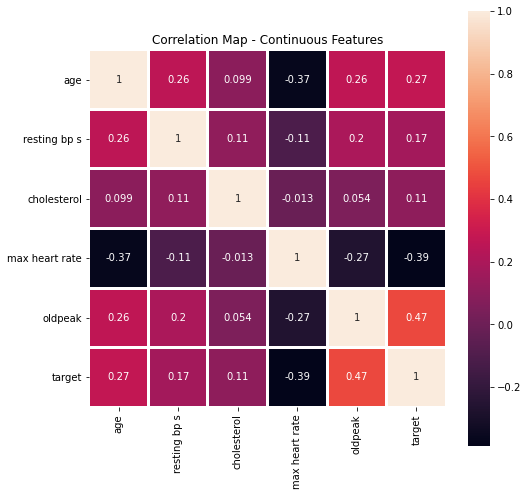

In [8]:
plt.figure(figsize=(8, 8))
data_corr = data[[*continuous, 'target']].corr()
sns.heatmap(data_corr, square=True, annot=True, linewidths=2)
plt.title('Correlation Map - Continuous Features')

plt.show()

## Pre-processing

In [9]:
data_encoded = data
data_encoded[categorical] = data_encoded[categorical].astype(object)
data_encoded = pd.get_dummies(data_encoded)

y = to_categorical(data_encoded['target'])

X = data_encoded.drop('target', axis=1).values
X_df = pd.DataFrame(X)
X_df.columns = data_encoded.drop('target', axis=1).columns

X = scale(data_encoded.drop('target', axis=1).values)

feature_train, feature_test, target_train, target_test = train_test_split(X, y, test_size=0.2)

input_dim = feature_train.shape[1]

## Model Training - MLPC

In [10]:
model = keras.models.Sequential([
    Input(input_dim),
    Dense(64, activation='relu'),
#     Dropout(0.1),
    Dense(64, activation='relu'),
#     Dropout(0.1),
    Dense(2)
])

In [11]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.005), 
              loss='mse', metrics=['categorical_accuracy'])

In [12]:
train_history = model.fit(feature_train, target_train, epochs=50, verbose=0)

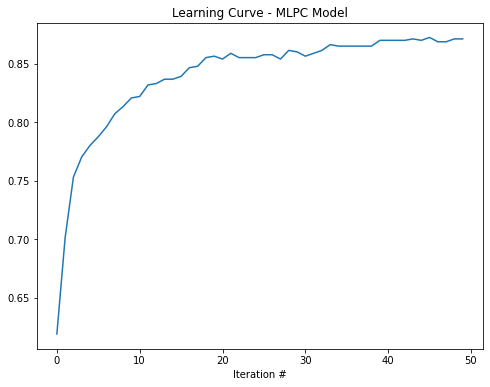

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(train_history.history['categorical_accuracy'], label='Accuracy')
plt.xlabel('Iteration #')
plt.title('Learning Curve - MLPC Model')
plt.show()

In [14]:
evaluate_result = model.evaluate(feature_test, target_test, verbose=0)
print('Accuracy:', evaluate_result[1])

Accuracy: 0.8333333134651184


### Confusion Matrix

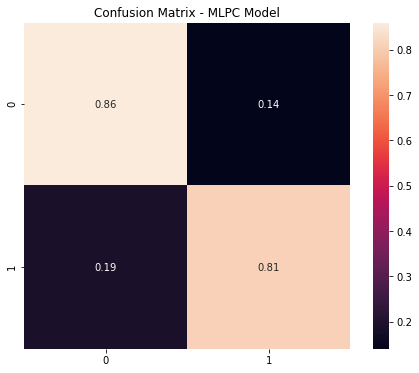

In [15]:
model.evaluate(feature_test, target_test, verbose=0)

classes = np.array([0, 1])

y_pred = np.argmax(model.predict(feature_test), axis=-1)
y_true = np.vectorize(lambda x : x[1], signature='(n)->()')(target_test)
con_mat = tf.math.confusion_matrix(y_true, y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm, index = classes, columns = classes)

plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix - MLPC Model')
sns.heatmap(con_mat_df, square=True, annot=True)

plt.show()

### Cross Validation

In [16]:
cross_validation_record = []

In [17]:
def train_model():
    feature_train, feature_test, target_train, target_test = train_test_split(X, y, test_size=0.2)
    model = keras.models.Sequential([
        Input(input_dim),
        Dense(64, activation='relu'),
#         Dropout(0.1),
        Dense(64, activation='relu'),
#         Dropout(0.1),
        Dense(2)
    ])
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.005), 
                  loss='mse', metrics=['categorical_accuracy'])
    train_history = model.fit(feature_train, target_train, epochs=50, verbose=0)
    evaluate_result = model.evaluate(feature_test, target_test, verbose=0)
    cross_validation_record.append(evaluate_result[1])

In [18]:
with tf.device('/cpu:0'):
    for _ in tqdm(range(50)):
        train_model()

100%|██████████| 50/50 [00:41<00:00,  1.22it/s]


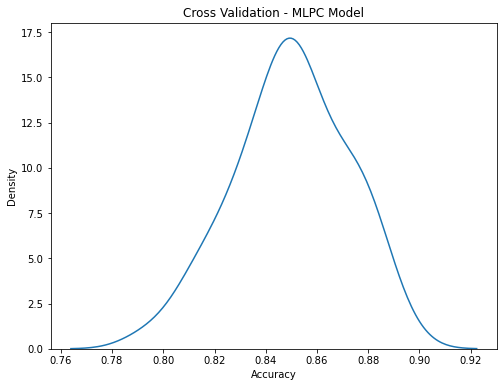

In [19]:
plt.figure(figsize=(8, 6))
sns.kdeplot(cross_validation_record)
plt.title('Cross Validation - MLPC Model')
plt.xlabel('Accuracy')
plt.show()

In [20]:
res_df = pd.DataFrame(pd.Series(cross_validation_record).describe())
res_df.columns = ['Value']
display(res_df.T)

,count,mean,std,min,25%,50%,75%,max
Value,50.0,0.849804,0.022006,0.794118,0.838235,0.85049,0.867647,0.892157


## Model Training - Naive Bayes

In [21]:
feature_train, feature_test, target_train, target_test = train_test_split(X, y, test_size=0.2)

model_NB = GaussianNB()

target_train_NB = np.vectorize(lambda x : x[1], signature='(n)->()')(target_train)
target_test_NB = np.vectorize(lambda x : x[1], signature='(n)->()')(target_test)
y_pred = model_NB.fit(feature_train, target_train_NB).predict(feature_test)
accuracy = (target_test_NB == y_pred).sum() / target_test.shape[0]
print(accuracy)

0.7254901960784313


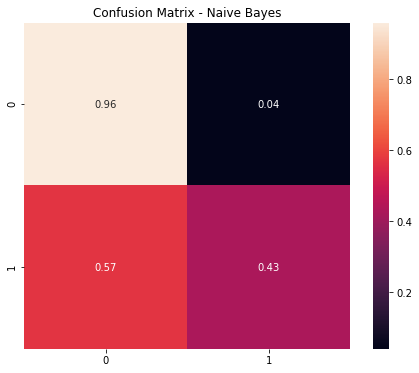

In [22]:
classes = np.array([0, 1])

y_pred = model_NB.predict(feature_test)
y_true = np.vectorize(lambda x : x[1], signature='(n)->()')(target_test)
con_mat = tf.math.confusion_matrix(y_true, y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm, index = classes, columns = classes)

plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix - Naive Bayes')
sns.heatmap(con_mat_df, square=True, annot=True)

plt.show()

### Cross Validation

In [23]:
train_record_NB = []

In [24]:
for _ in tqdm(range(1000)):
    feature_train, feature_test, target_train, target_test = train_test_split(X, y, test_size=0.2)

    model_NB = GaussianNB()

    target_train_NB = np.vectorize(lambda x : x[1], signature='(n)->()')(target_train)
    target_test_NB = np.vectorize(lambda x : x[1], signature='(n)->()')(target_test)
    y_pred = model_NB.fit(feature_train, target_train_NB).predict(feature_test)
    accuracy = (target_test_NB == y_pred).sum() / target_test.shape[0]
    train_record_NB.append(accuracy)

100%|██████████| 1000/1000 [00:03<00:00, 328.31it/s]


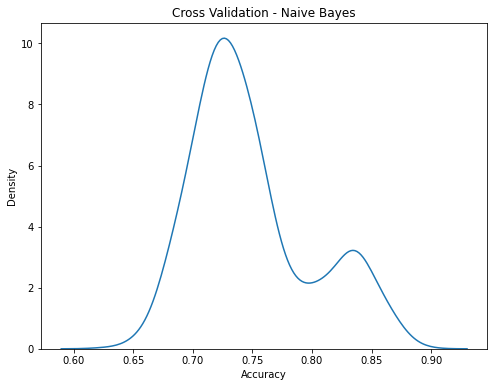

In [25]:
plt.figure(figsize=(8, 6))

sns.kdeplot(train_record_NB)

plt.title('Cross Validation - Naive Bayes')
plt.xlabel('Accuracy')

plt.show()

In [26]:
res_df = pd.DataFrame(pd.Series(train_record_NB).describe())
res_df.columns = ['Value']
display(res_df.T)

,count,mean,std,min,25%,50%,75%,max
Value,1000.0,0.748515,0.050279,0.627451,0.714461,0.735294,0.769608,0.892157


## Sensitivity Analysis

In [27]:
def generate_avg_entry(data):
    data_copy = data.copy().astype(float)
    stat = data_copy.describe()
    data_copy.iloc[0] = stat.loc['mean', :]
    for item in categorical:
        data_copy.loc[0, item] = round(stat[item]['mean'])
    return data_copy.iloc[0]

def generate_cont_test_data(avg_entry, data, feature):
    cnt = 1000
    data_copy = data.copy().drop('target', axis=1)
    data_copy.iloc[0] = avg_entry
    data_copy[categorical] = data_copy[categorical].astype(int).astype(object)
    cont_stat = data.describe()
    max_val = cont_stat[feature]['75%']
    min_val = cont_stat[feature]['25%']
    interval = np.linspace(min_val, max_val, cnt)
    avg_entry_encoded = pd.get_dummies(data_copy).iloc[0]
    
    res = pd.DataFrame(np.tile(avg_entry_encoded, cnt).reshape(cnt, -1))
    res.columns = data_encoded.drop('target', axis=1).columns
    res[feature] = interval
    return res.values

avg_entry = generate_avg_entry(data)

### Analysis of Continuous Features

$$
\text{Score} = \frac{x_2 - x_1}{|x_2| + |x_1|}
$$

100%|██████████| 5/5 [00:00<00:00,  5.05it/s]


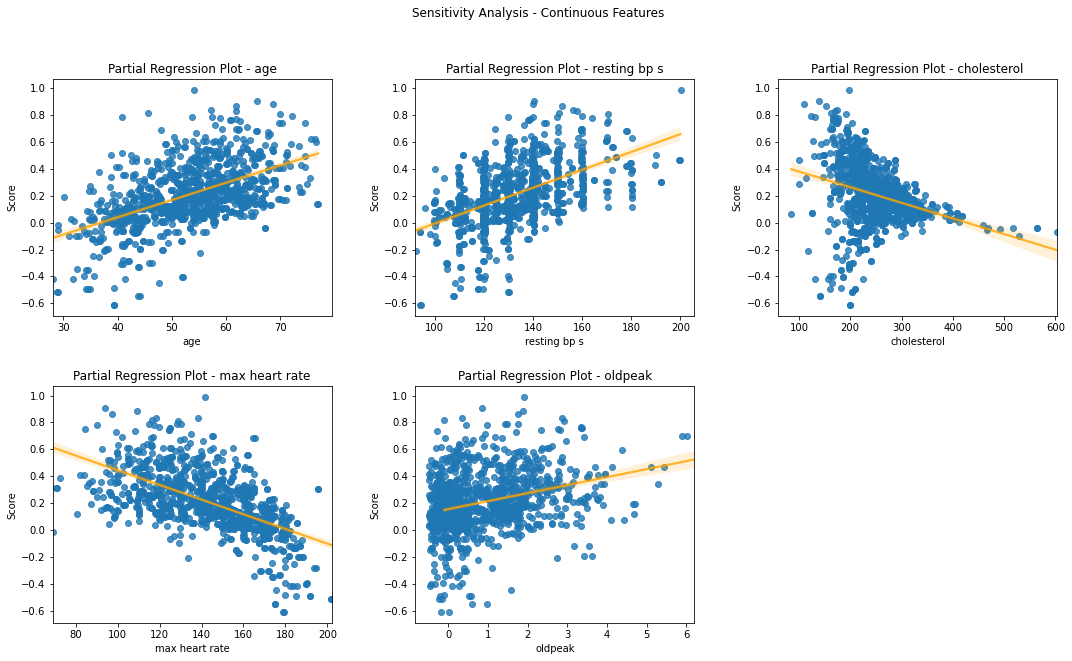

In [28]:
# model = keras.models.Sequential([model, Softmax()])
convert_to_score = np.vectorize(lambda x : (x[1] - x[0]) / (abs(x[0]) + abs(x[1])), signature='(n)->()')
# convert_to_score = np.vectorize(lambda x : x[1] - x[0], signature='(n)->()')
plt.figure(figsize=(18, 10))

plt_cnt = 0
for feature in tqdm(continuous):
    plt_cnt += 1
    plt.subplot(2, 3, plt_cnt)
    X_df_copy = X_df.copy()
    X_df_copy.sort_values(by=feature, inplace=True)
    prediction = model.predict(X_df_copy.values)
    sns.regplot(x=X_df_copy[feature], y=convert_to_score(prediction), label=feature, 
                line_kws={'color': 'orange', 'alpha': 0.8},
                x_jitter=.5)
    plt.xlabel(feature)
    plt.ylabel('Score')
    plt.title(f'Partial Regression Plot - {feature}')

plt.suptitle('Sensitivity Analysis - Continuous Features')
plt.ylabel('Score')
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

### Analysis of Categorical Feature

In [29]:
age_var_data = generate_cont_test_data(avg_entry, data, 'age')
age_var_df = pd.DataFrame(age_var_data)
age_var_df.columns = data_encoded.drop('target', axis=1).columns

feature_cat_dict = dict()

for feature in categorical:
    feature_cat_dict[feature] = []
    for val in np.array(data[feature].value_counts().index):
        feature_cat_dict[feature].append(f'{feature}_{val}')

for feature in feature_cat_dict:
    feature_cat_dict[feature] = sorted(feature_cat_dict[feature])

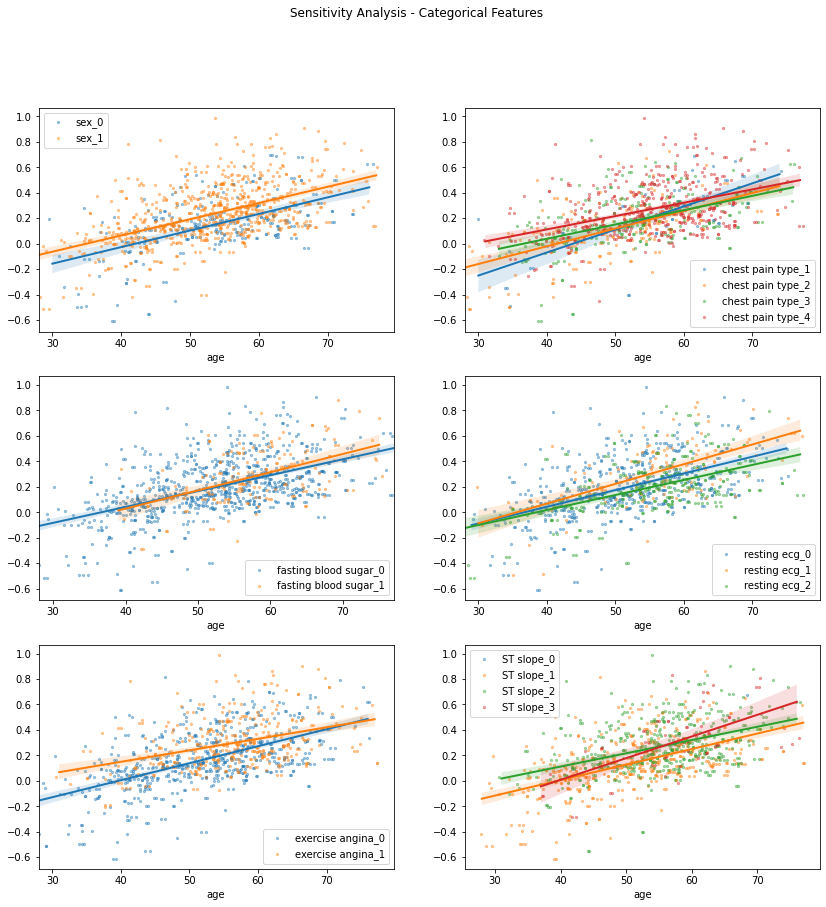

In [30]:
plot_cnt = 0
plt.figure(figsize=(14, 14))

for feature in feature_cat_dict:
    plot_cnt += 1
    vals = feature_cat_dict.get(feature)
    plt.subplot(3, 2, plot_cnt)
    for val in vals:
        X_df_copy = X_df.copy()
        X_df_copy = X_df_copy[X_df_copy[val] == 1]
        X_df_copy.sort_values(by='age', inplace=True)
        sns.regplot(x=X_df_copy['age'], y=convert_to_score(model.predict(X_df_copy.values)),
                   scatter_kws={'alpha':.4, 's':5}, line_kws={'lw':2},
                   label=val, x_jitter=.5)
    plt.legend()
        
plt.suptitle('Sensitivity Analysis - Categorical Features')
# plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

### Sensitivity Analysis - Cholesterol

In [31]:
# convert_to_score = np.vectorize(lambda x : x[1] - x[0], signature='(n)->()')
def analysis_chol():
    i = 0
    for _ in tqdm(range(10)):
        i += 1
        feature_train, feature_test, target_train, target_test = train_test_split(X, y, test_size=0.2)
        model = keras.models.Sequential([
            Input(input_dim),
            Dense(64, activation='relu'),
            Dense(64, activation='relu'),
            Dense(2)
        ])
        model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.005), 
                      loss='mse', metrics=['categorical_accuracy'])
        train_history = model.fit(feature_train, target_train, epochs=50, verbose=0)
        X_df_copy = X_df.copy()
        X_df_copy.sort_values(by='cholesterol', inplace=True)
        prediction = model.predict(X_df_copy.values)
        sns.regplot(x=X_df_copy['cholesterol'], y=convert_to_score(prediction), 
                    x_jitter=.5, scatter_kws={'s':.5, 'alpha':.75}, label=f'Trail {i}')
    plt.legend()
    

100%|██████████| 10/10 [00:09<00:00,  1.03it/s]


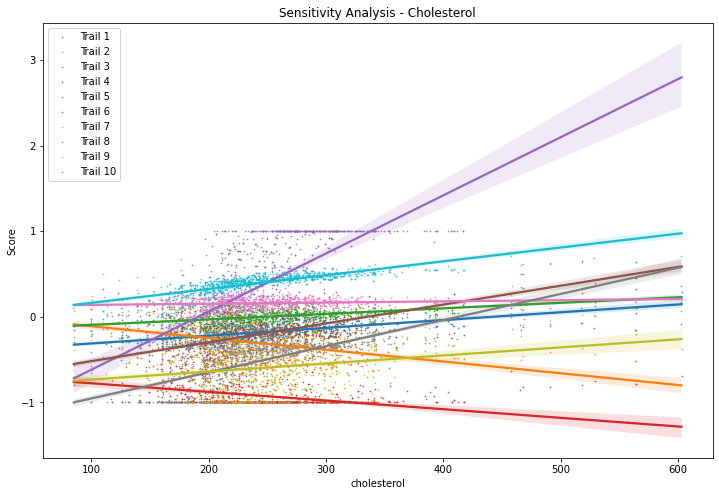

In [32]:
plt.figure(figsize=(12, 8))

with tf.device('/cpu:0'):
    analysis_chol()

plt.title('Sensitivity Analysis - Cholesterol')
plt.ylabel('Score')
plt.show()